In [11]:
import numpy as np
from scipy.signal import convolve2d
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.transforms as tf
from scipy import datasets
import scipy.linalg as la
import time
from pathlib import Path

In [12]:
def rng():
    return np.random.default_rng(int(42))

In [13]:
%matplotlib inline

In [14]:
def sharrkernel():
    kernel1 = [np.array([[ -3-3j, 0-10j,  +3 -3j],
                        [-10+0j, 0+ 0j, +10 +0j],
                        [ -3+3j, 0+10j,  +3 +3j]])]
    kernel2 = [np.array([[-0.5-0.5j, 0-0.5j, +0.5-0.5j],
                        [-0.5+  0j, 0+  0j, +0.5+  0j],
                        [-0.5+0.5j, 0+0.5j, +0.5+0.5j]])]
    return[kernel1, kernel2]
def convolve(im,kernelp,c):

    imr = im[:,:,0]
    img = im[:,:,1]
    imb = im[:,:,2]

    r = convolve2d(imr, kernelp[0])
    
    '''
    g1 = (r.shape[0]-c)/imr.shape[0]
    g2 = (r.shape[1]-c)/imr.shape[1]

    s1 = int(np.ceil(((imr.shape[0])*g1)+c))
    s2 = int(np.ceil(((imr.shape[1])*g2)+c))
    '''
    s1 = imr.shape[0]
    s2 = imr.shape[1]
    
    rgbki = []
    for i in kernelp:
            r = convolve2d(imr, i, mode='same')
            g = convolve2d(img, i, mode='same')
            b = convolve2d(imb, i, mode='same')
            r = np.reshape(r, (s1, s2, 1))
            g = np.reshape(g, (s1, s2, 1))
            b = np.reshape(b, (s1, s2, 1))
            rgbki.append(np.r_['2',r,g,b])

    rgb = np.absolute(rgbki[0])
    for i in rgbki[1:]:
        rgb = np.add(rgb,np.absolute(i))
    return rgb

def smooth(rgb, kernel):

    d, e = convolve2d(rgb[:,:,0], kernel).shape

    y = [rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]]
    temp = []

    for i in y:
        p = convolve2d(i, kernel)
        p = np.reshape(p, (d, e, 1))
        temp.append(p)

    out = np.concatenate([temp[0], temp[1], temp[2]], axis=2)
    return out
def kernel(c):

    kernel1 = np.zeros((c,c))
    kernel2 = np.zeros((c,c))

    a = int((c/3))
    b = int(2*(c/3))
    c = c

    h1 = (0.5)/((c*c)/9)
    h2 = (0.25)/((c*c)/9)

    kernel1[0:a,0:c], kernel1[b:c,0:c] =  h1, -h1  
    kernel2[0:c,0:a], kernel2[0:c,b:c] =  h1, -h1

    kernel1[0:a,0:a], kernel1[0:a,b:c], kernel1[b:c,0:a], kernel1[b:c,b:c] =  h2,  h2, -h2, -h2
    kernel2[0:a,0:a], kernel2[0:a,b:c], kernel2[b:c,0:a], kernel2[b:c,b:c] =  h2, -h2,  h2, -h2
    
    '''
    kernel1[0,0:a], kernel1[0,b:c] = h,-h
    kernel2[0,0:a], kernel2[0,b:c] = -h,h

    kernel3[0:a,0], kernel3[b:c,0] = h,-h
    kernel4[0:a,0], kernel4[b:c,0] = -h,h
    '''

    #return([kernel1,kernel2,kernel3,kernel4])
    #return([kernel2,kernel4])
    return([kernel1,kernel2])

In [15]:
print(kernel(3)[0])

[[ 0.25  0.5   0.25]
 [ 0.    0.    0.  ]
 [-0.25 -0.5  -0.25]]


In [16]:

impath = input("Enter file path:")
im2 = Image.open(impath)
im2 = np.array(im2)/255
print(np.max(im2))
print(np.min(im2))

'''
for i in range(im2.shape[0]):
    for j in range(im2.shape[1]):
        for k in range(im2.shape[2]):
            if im2[i,j,k]==1:
                im2[i,j,k]=0.9999
'''
                
#im22 = 1-im2
#im22 = np.sum(im22, axis=2)

0.9215686274509803
0.0


'\nfor i in range(im2.shape[0]):\n    for j in range(im2.shape[1]):\n        for k in range(im2.shape[2]):\n            if im2[i,j,k]==1:\n                im2[i,j,k]=0.9999\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


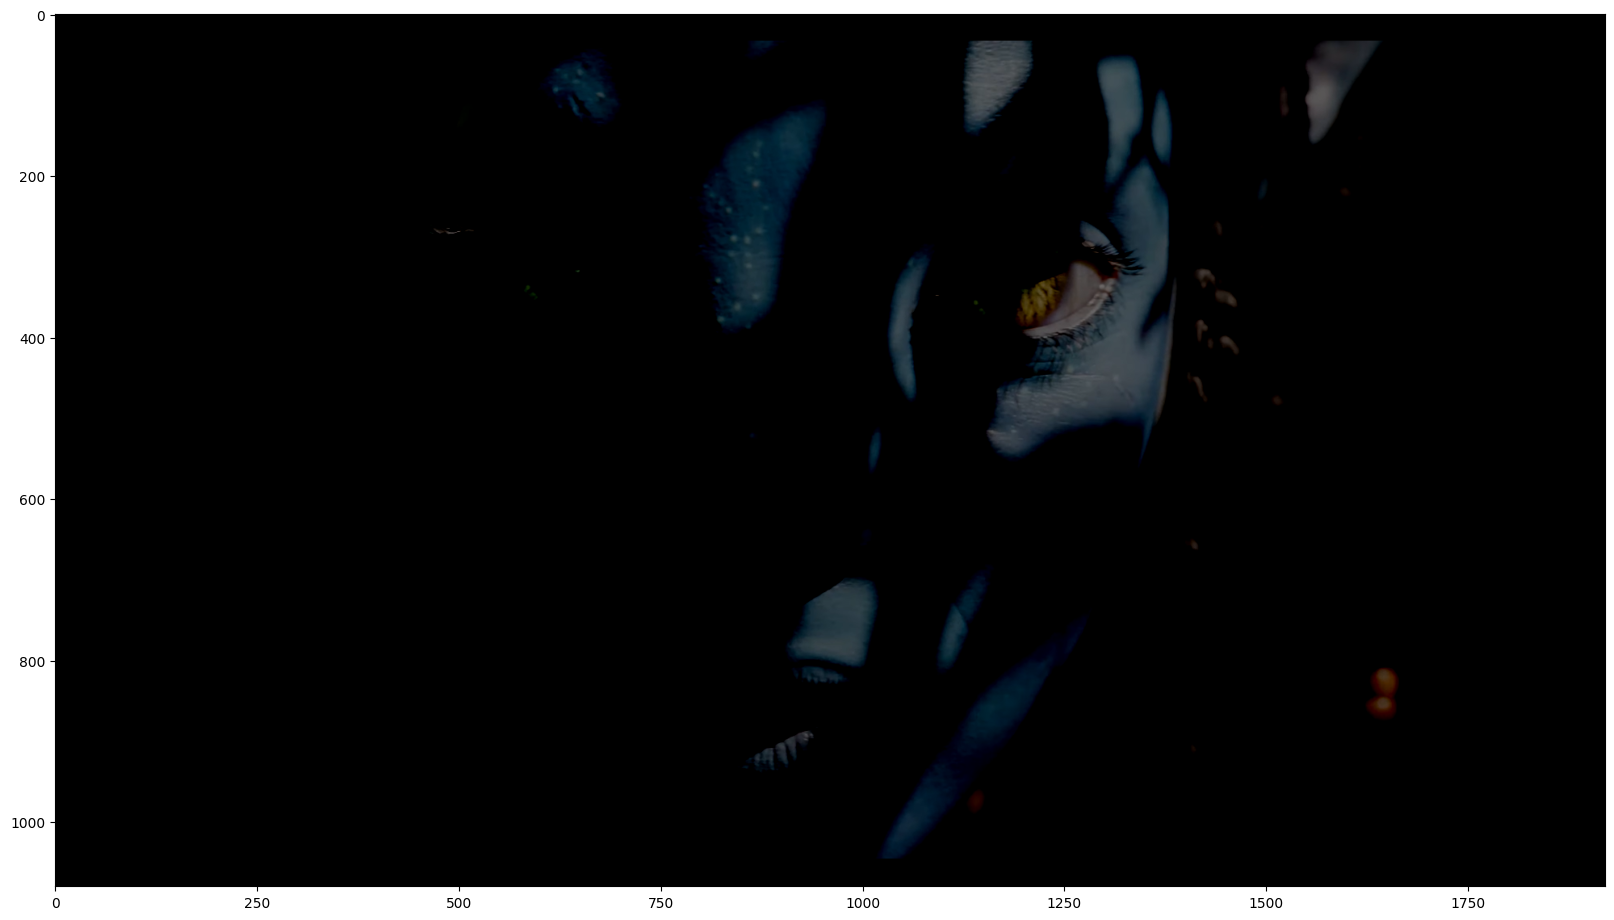

In [22]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(20)
imx = im2-0.5
plt.imshow(imx)

l = []
v = []
m = []
for i in [3,6]:
    r = convolve2d(imr, kernelx(i)[0])
    l.append((r.shape[0]-i)/imr.shape[0])
    l.append((r.shape[1]-i)/imr.shape[1])
    v.append(r.shape)
if l[0]==l[2] and l[1]==l[3]:
    print("rowc:", l[0])
    print("colc:", l[1])
    print("OK")
else: 
    print("NOT OK")

#[(2062, 1377), (2068, 1383), (2077, 1392)]
#[(2062, 1377), (2068, 1383), (2077, 1392)]
#OK

In [18]:
ks = 3
rgb = convolve(im2,kernel(ks),ks)
fshape = (rgb.shape[0],rgb.shape[1])
print(fshape)
rgb = rgb[1:fshape[0]-1, 1:fshape[1]-1]
fshape = (rgb.shape[0],rgb.shape[1])
print(fshape)
print('max:',np.max(rgb))
print('min:',np.min(rgb))

(1080, 1920)
(1078, 1918)
max: 0.8941176470588235
min: 0.0


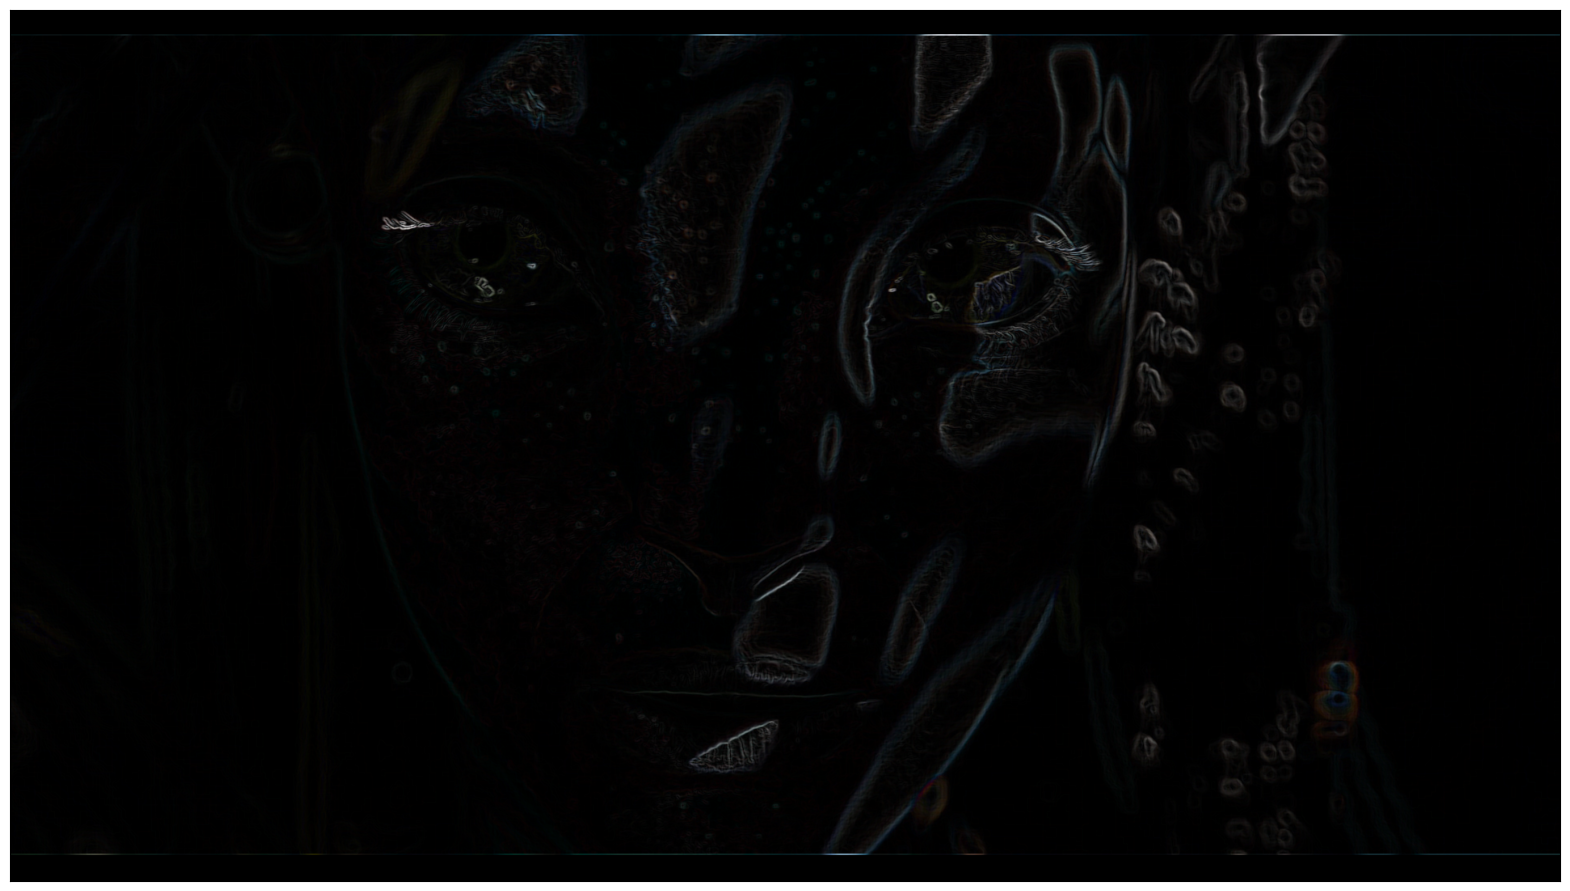

In [19]:
#implot = rgb
#implot = ((1-rgb)*(2**(-(1-rgb))))
#implot = (np.log1p(1-rgb)+0.306)**5
#implot = rgb*5

notptbs = time.strftime("%A %d-%m-%Y %H.%M.%S")
notptbs = Path("C:/Users/Nagaraju Chukkala/Pictures/python/conv/", notptbs + ".png")

implot = rgb

ss = 6
smoother = [[[[1/(ss*ss)]*ss]*ss]]
smoother = np.array(smoother).reshape(ss,ss)
#implot = smooth(implot, smoother)

fig, ax = plt.subplots()
ax.imshow(implot)

fig.set_figheight(20)
fig.set_figwidth(20)

ax.set_xticks([])
ax.set_yticks([])
plt.savefig(fname = notptbs, dpi=144, bbox_inches='tight', pad_inches=0)

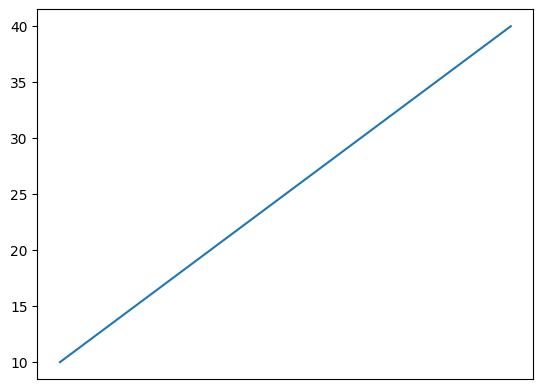

In [20]:
import matplotlib.pyplot as plt

# create some sample data
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

# create a plot
fig, ax = plt.subplots()
ax.plot(x, y)

# turn off title and indexing
ax.set_title('')
ax.set_xticks([])

# display the plot
plt.show()
